# MUSHROOM CLASSIFICATION

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("mushrooms.csv")

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
stalk_root = {"stalk_root":{"?":"m"}}
df = df.replace(stalk_root)

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.shape

(8124, 23)

In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


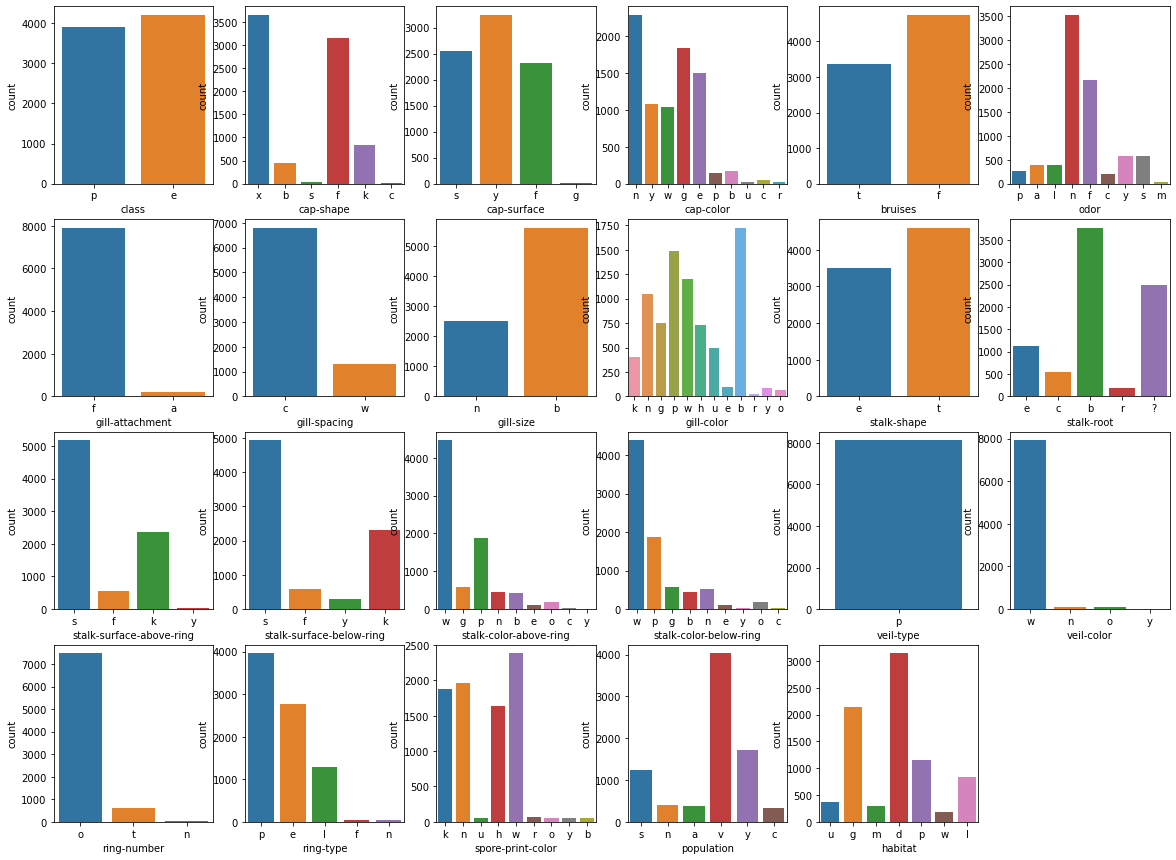

In [10]:
#Visualization
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1
for column in df:
    if plotnumber <= 23:
        ax = plt.subplot(4,6,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column, fontsize = 10)
    plotnumber += 1
plt.show()

In [11]:
del df['veil-type']

### Visualisation of features in the data with respect to class variable

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and Gill_Size')

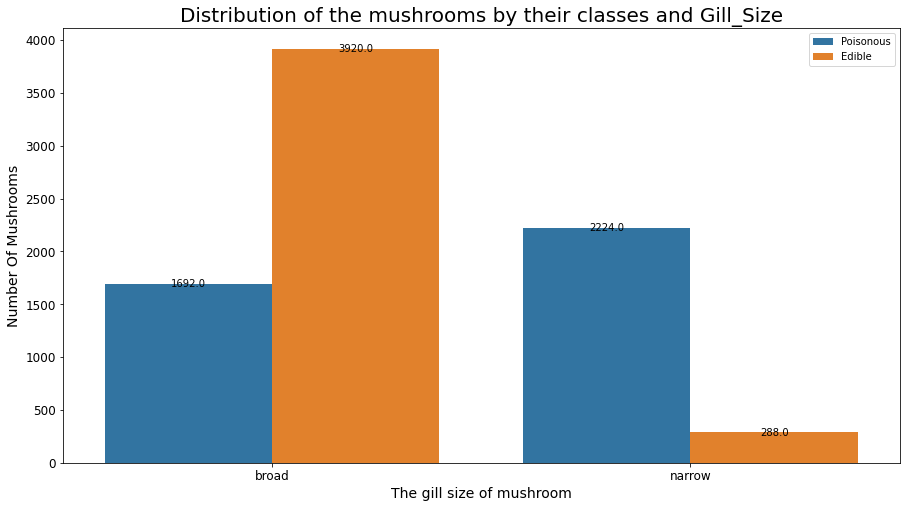

In [12]:
#Distribution of the mushrooms by their classes and Gill_Size
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='gill-size',hue='class',order=df['gill-size'].value_counts().index)

multi_plot.set_xticklabels(['broad','narrow'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The gill size of mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and Gill_Size",fontsize =20)                                          

#### Interpretation: Mushrooms with broad gill size are more edible and less poisonous whereas mushrooms with narrow gill size are more poisinous and lss edible

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and Stalk Root')

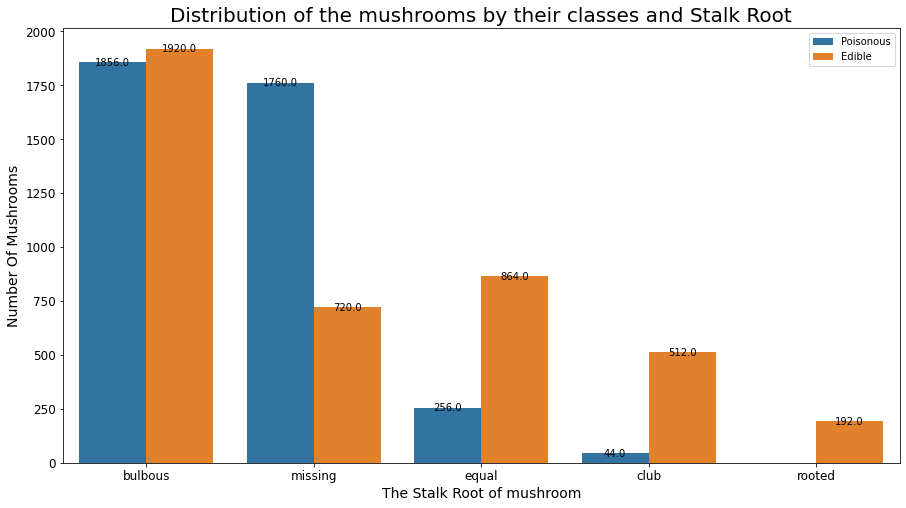

In [13]:
#Distribution of the mushrooms by their classes and Stalk Root
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='stalk-root',hue='class',order=df['stalk-root'].value_counts().index)

multi_plot.set_xticklabels(['bulbous','missing','equal','club','rooted'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The Stalk Root of mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and Stalk Root",fontsize =20)                                         

#### Interpretation: Mushrooms with bulbous are more poisonous comparing to others

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and Stalk Surface Below Ring')

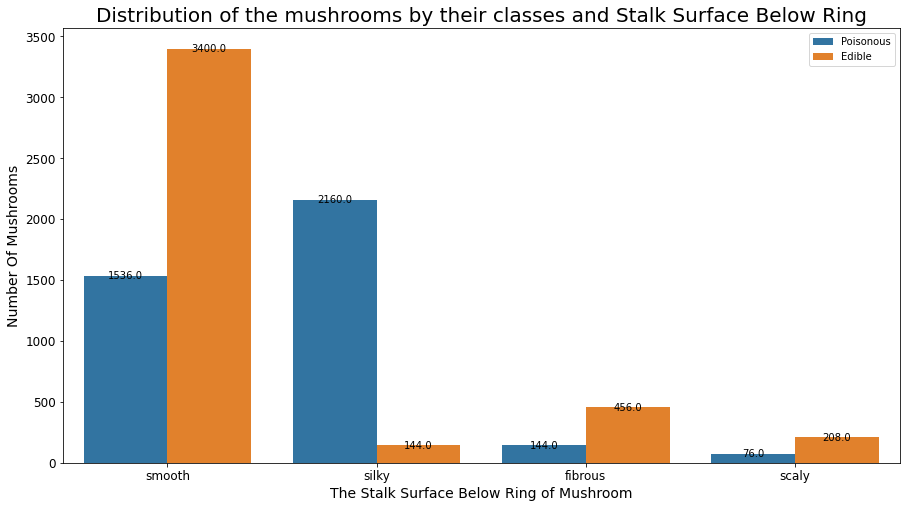

In [14]:
#Distribution of the mushrooms by their classes and Stalk Surface Below Ring
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='stalk-surface-below-ring',hue='class',
                           order=df['stalk-surface-below-ring'].value_counts().index)

multi_plot.set_xticklabels(['smooth' , 'silky' , 'fibrous', 'scaly'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The Stalk Surface Below Ring of Mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and Stalk Surface Below Ring",fontsize =20)                           

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and Stalk Color Below Ring')

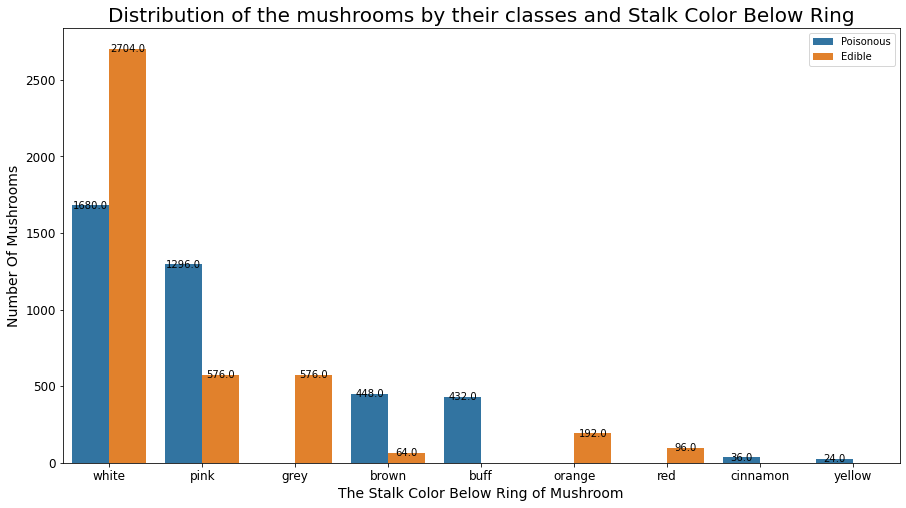

In [15]:
#Distribution of the mushrooms by their classes and Stalk Color Below Ring
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='stalk-color-below-ring',hue='class',
                           order=df['stalk-color-below-ring'].value_counts().index)

multi_plot.set_xticklabels(['white' , 'pink' , 'grey', 'brown' , 'buff' , 'orange' , 'red', 'cinnamon' , 'yellow'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The Stalk Color Below Ring of Mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and Stalk Color Below Ring",fontsize =20)

#### Interpretation: There are more edible mushrooms with white stalk color below ring

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and Veil Color')

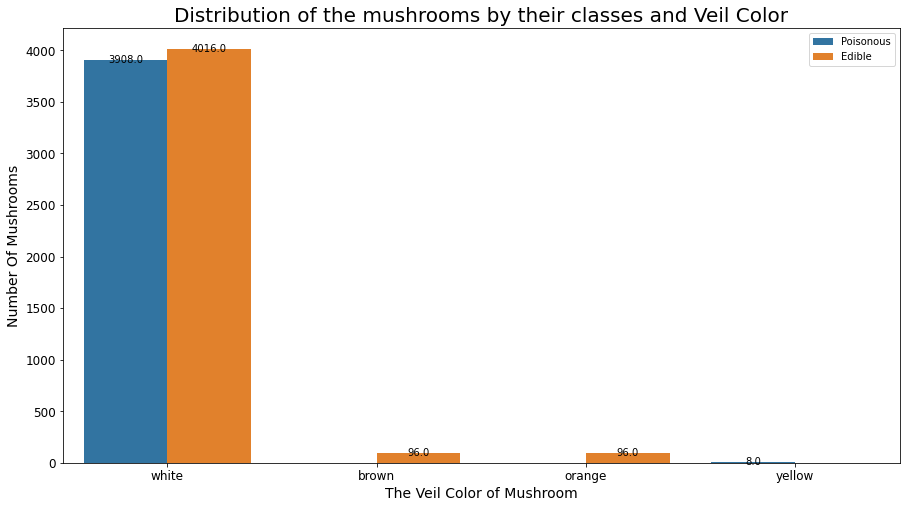

In [16]:
#Distribution of the mushrooms by their classes and Veil Color
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='veil-color',hue='class',
                           order=df['veil-color'].value_counts().index)

multi_plot.set_xticklabels(['white','brown','orange','yellow'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The Veil Color of Mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and Veil Color",fontsize =20)                                         

#### Interpretation: There are almost eaual edible and poisonous mushrooms with white veil color

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and Ring Numbers')

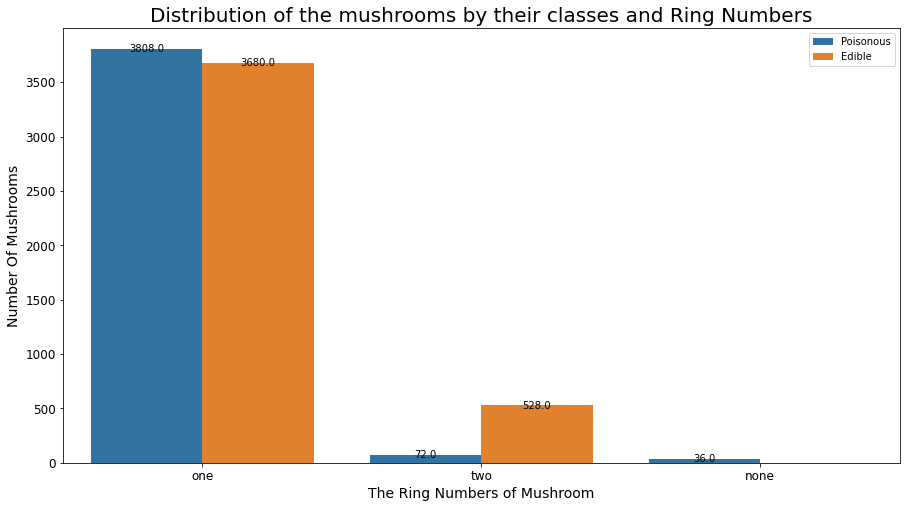

In [17]:
#Distribution of the mushrooms by their classes and Ring Numbers
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='ring-number',hue='class',
                           order=df['ring-number'].value_counts().index)

multi_plot.set_xticklabels(['one','two','none'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The Ring Numbers of Mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and Ring Numbers",fontsize =20)                                       

#### Interpretation: There are almost eaual edible and poisonous mushrooms with ring number = 1

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and Spore Print Color')

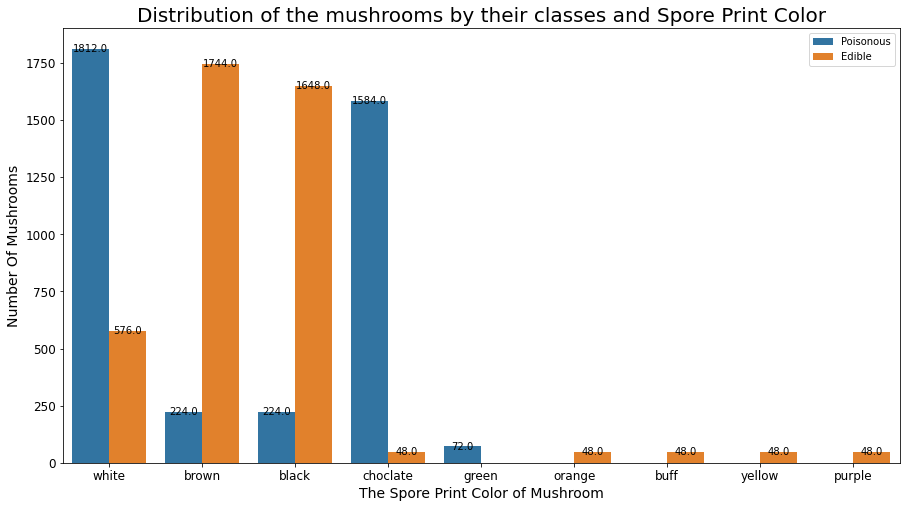

In [18]:
#Distribution of the mushrooms by their classes and Spore Print Color
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='spore-print-color',hue='class',
                           order=df['spore-print-color'].value_counts().index)

multi_plot.set_xticklabels(['white','brown','black','choclate','green','orange','buff','yellow','purple'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The Spore Print Color of Mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and Spore Print Color",fontsize =20)                                  

#### Interpretation: There are more poisonous mushrooms with Spore Print Color as choclate or white and more edible mushrooms with Spore Print Color as brown or black 

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and Habitat')

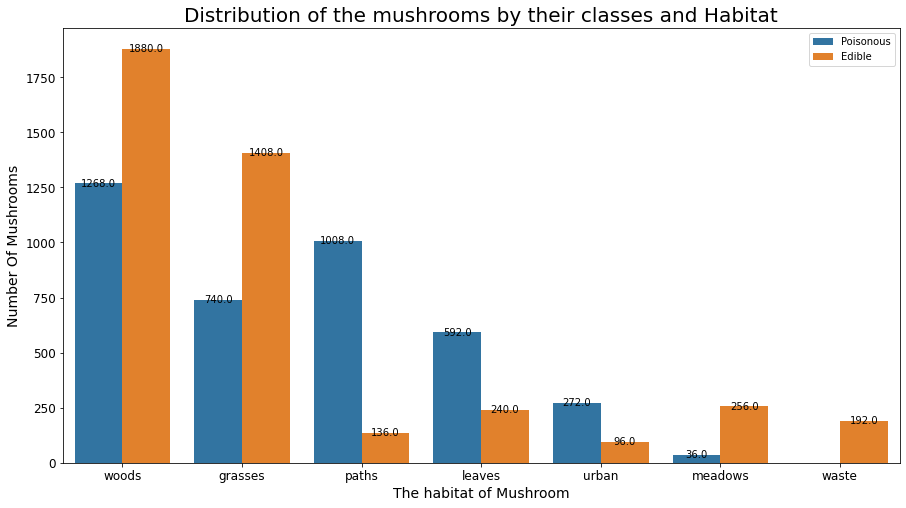

In [19]:
#Distribution of the mushrooms by their classes and Habitat
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='habitat',hue='class',
                           order=df['habitat'].value_counts().index)

multi_plot.set_xticklabels(['woods','grasses','paths','leaves','urban','meadows','waste'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The habitat of Mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and Habitat",fontsize =20)                                            

#### Interpretation: There are more poisonous mushrooms with Habitat as paths or leaves whereas more edible mushrooms with Habitat as woods or grasses 

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and Population')

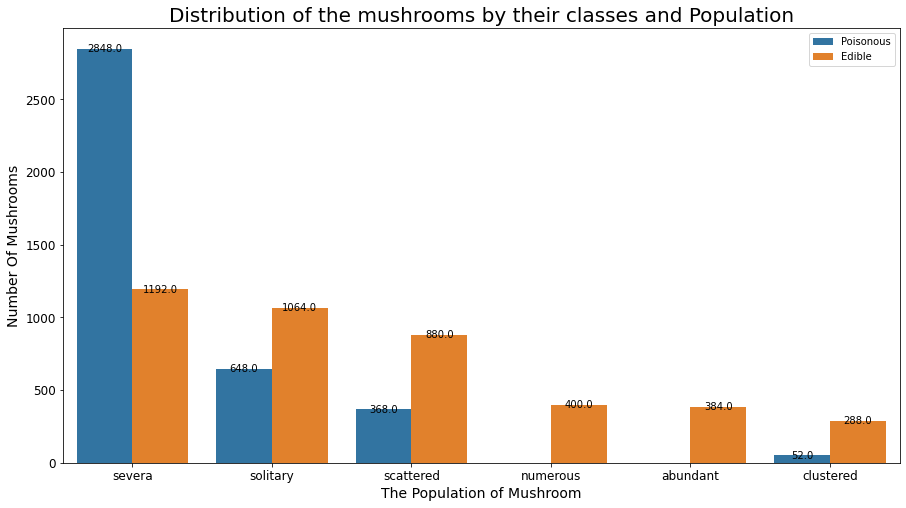

In [20]:
#Distribution of the mushrooms by their classes and Population
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='population',hue='class',
                           order=df['population'].value_counts().index)

multi_plot.set_xticklabels(['severa','solitary','scattered','numerous','abundant','clustered'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The Population of Mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and Population",fontsize =20)

#### Interpretation: There are more poisonous mushrooms with Severa popukation and rest population of mushrooms are more edible.

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and Cap Shape')

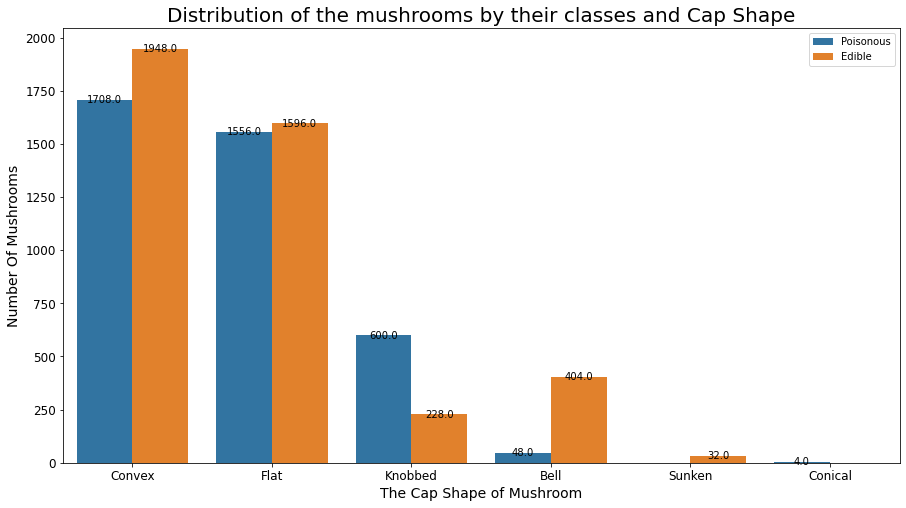

In [21]:
#Distribution of the mushrooms by their classes and Cap Shape
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='cap-shape',hue='class',
                           order=df['cap-shape'].value_counts().index)

multi_plot.set_xticklabels(['Convex','Flat','Knobbed','Bell','Sunken','Conical'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The Cap Shape of Mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and Cap Shape",fontsize =20)                                          

#### Interpretation: There are more edible mushrooms of convex cap shape compares to poisonous mushrooms. Flat cap shape mushrooms have almost equal number of edible and poisonus mushrooms

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and Cap Color')

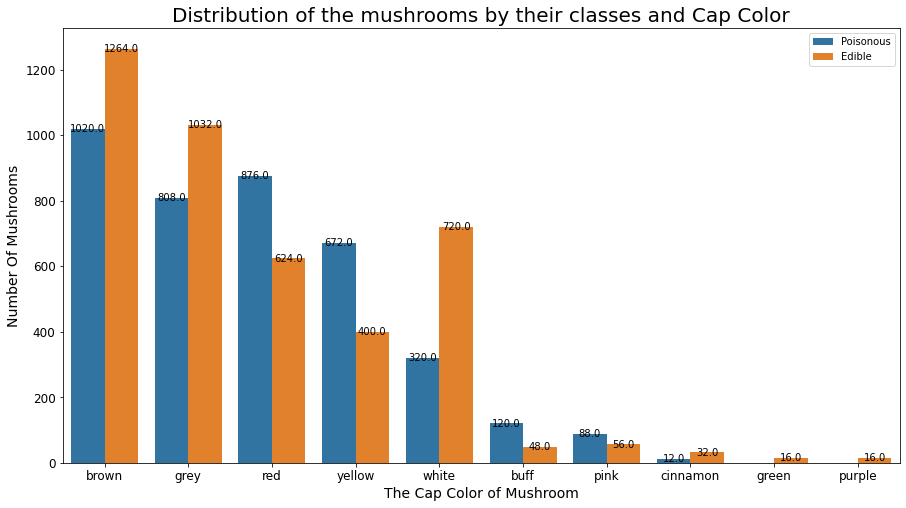

In [22]:
#Distribution of the mushrooms by their classes and Cap Color
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='cap-color',hue='class',
                           order=df['cap-color'].value_counts().index)

multi_plot.set_xticklabels(['brown','grey','red' ,'yellow', 'white','buff' , 'pink' , 'cinnamon' ,'green','purple'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The Cap Color of Mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and Cap Color",fontsize =20)

#### Interpretation: There are more poisonous mushrooms as compared to edible mushrooms with red and yellow cap colors. On other hand, there are less poisonous mushrooms as compared to edible mushrooms with brown, grey and white cap colors

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and Cap Surface')

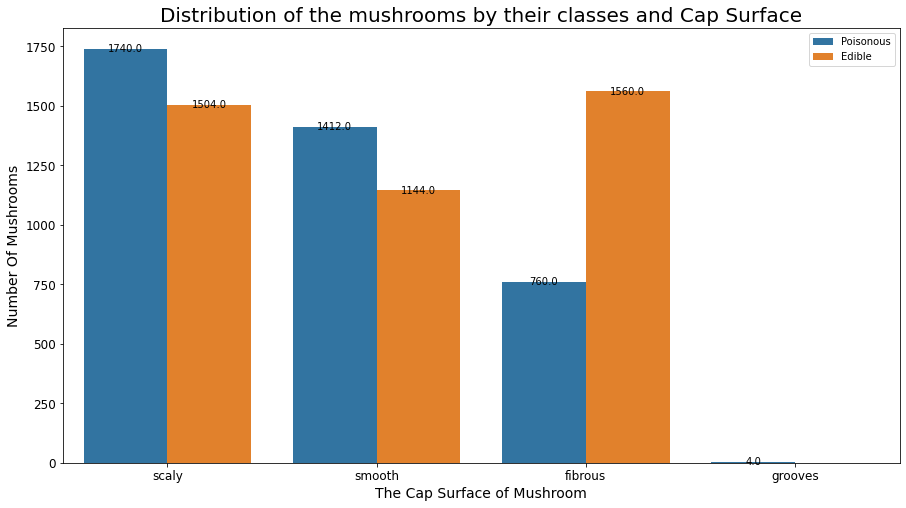

In [23]:
#Distribution of the mushrooms by their classes and Cap Surface
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='cap-surface',hue='class',
                           order=df['cap-surface'].value_counts().index)

multi_plot.set_xticklabels(['scaly','smooth','fibrous','grooves'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The Cap Surface of Mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and Cap Surface",fontsize =20)

#### Interpretation: There are more edible mushrooms having fibrous cap surface and more poisonous mushrooms having either scaly cap surface or smooth cap surface.

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and bruises')

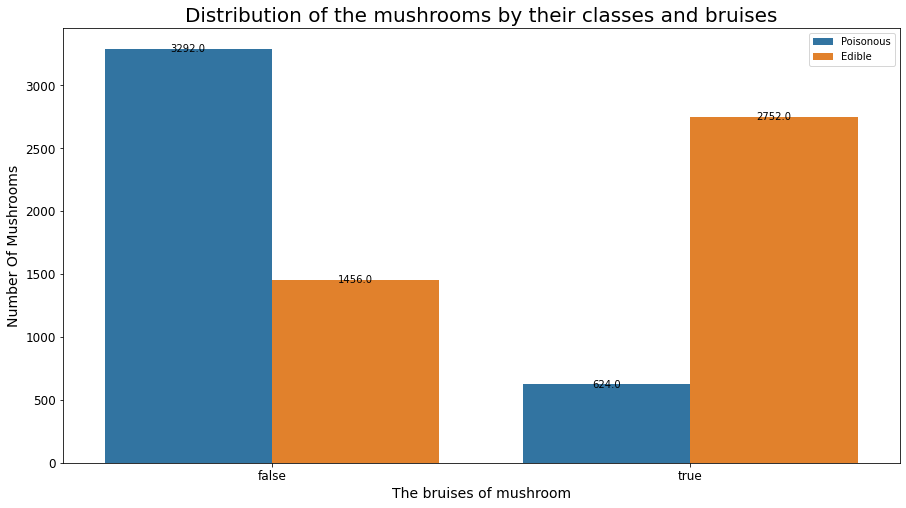

In [24]:
#Distribution of the mushrooms by their classes and Bruises
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='bruises',hue='class',order=df['bruises'].value_counts().index)

multi_plot.set_xticklabels(['false','true'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The bruises of mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and bruises",fontsize =20)

#### Interpretation: If bruises are present at mushroom then it is most likely to be edible otherwise it may be poisonous

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and Odor')

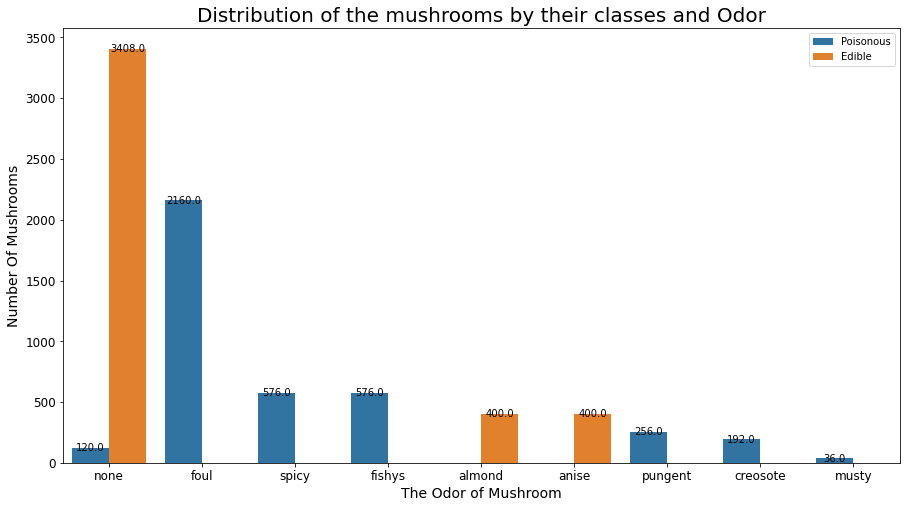

In [25]:
#Distribution of the mushrooms by their classes and Odor
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='odor',hue='class',
                           order=df['odor'].value_counts().index)

multi_plot.set_xticklabels(['none','foul','spicy' ,'fishys', 'almond','anise' , 'pungent' , 'creosote' ,'musty'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The Odor of Mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and Odor",fontsize =20)

#### Interpretation: Mushrooms with no odour or having the odour of almond are most likley to be edible. On the other hand, mushrooms having foul or spicy are most likey to be poisonus.

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and Gill Color')

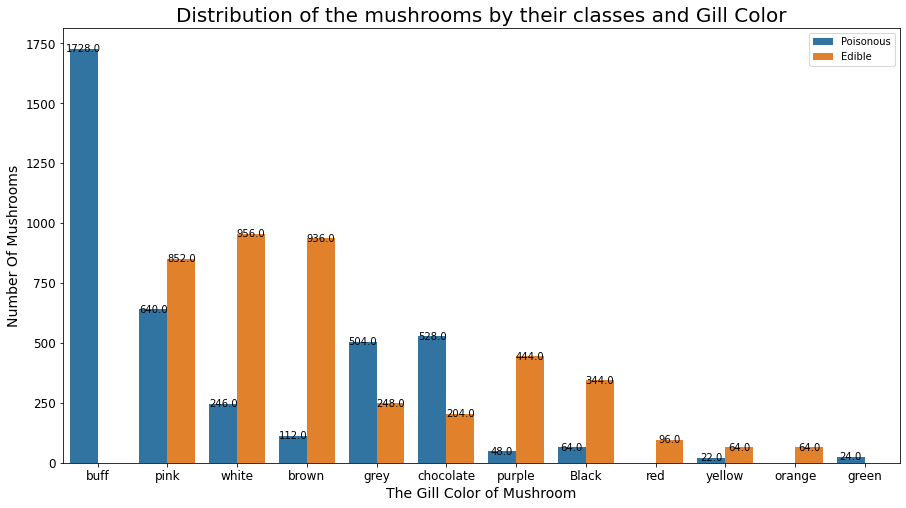

In [26]:
#Distribution of the mushrooms by their classes and Gill Color
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='gill-color',hue='class',
                           order=df['gill-color'].value_counts().index)

multi_plot.set_xticklabels(['buff','pink','white','brown','grey','chocolate','purple','Black','red','yellow','orange','green'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The Gill Color of Mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and Gill Color",fontsize =20)

#### Interpretation: Mushrooms having buff Gill colour our poisonous in nature 

Text(0.5, 1.0, 'Distribution of the mushrooms by their classes and Gill Spacing')

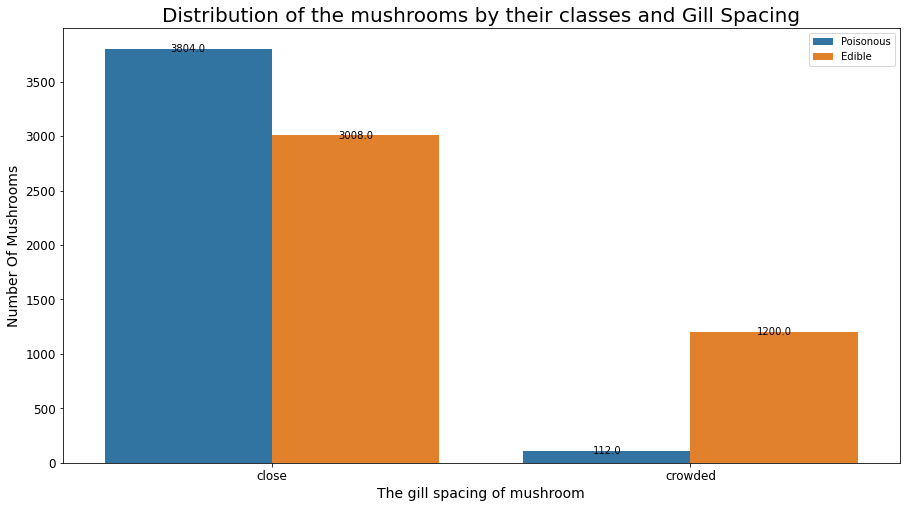

In [27]:
#Distribution of the mushrooms by their classes and Gill Spacing
plt.figure(figsize = (15,8))
multi_plot = sns.countplot(data =df, x='gill-spacing',hue='class',order=df['gill-spacing'].value_counts().index)

multi_plot.set_xticklabels(['close','crowded'])

for p in multi_plot.patches:
    multi_plot.annotate(format(p.get_height(),'.1f'),
                       (p.get_x() + p.get_width() / 2,p.get_height()),
                       ha = 'center', va = 'center')

plt.legend(['Poisonous','Edible'], loc = 'upper right')
plt.ylabel('Number Of Mushrooms', fontsize =14)
plt.xlabel('The gill spacing of mushroom', fontsize =14 )
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.title("Distribution of the mushrooms by their classes and Gill Spacing",fontsize =20)

#### Interpretation: Mushroooms having close spacing between gills are poisonous comparing to mushrooms having crowded spacing between their gills.

### Data Pre-Processing

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve ,roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Label Encoding

In [29]:
le = LabelEncoder()
D_F = df.apply(le.fit_transform)
D_F

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


#### Independent and dependent Variables

In [30]:
X = D_F.drop("class" , axis= 1)
y = D_F['class']

#### Splitting Data Set into training and testing

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101)                                                          

#### Deponent Names

In [32]:
target_names = ['Edible' , 'Poisonous']                                                                                         

## MODEL BUILDING
### DECISION TREE

In [33]:
dt = DecisionTreeClassifier(random_state= 265)
dt = dt.fit(X_train,y_train)                                                                                                    

Accuracy: 1.0
----------------------------------------
Confusion Matrix


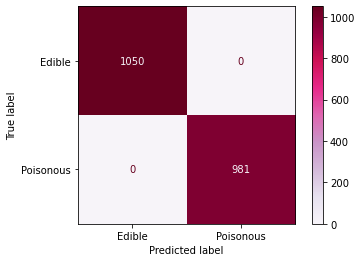

----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

----------------------------------------
AUC Score: 1.0


In [34]:
#Predictions:

y_pred = dt.predict(X_test)


#Performance:

print("Accuracy:", accuracy_score(y_test,y_pred))
print("----------------------------------------")

#Confusion Marix and its Visualisation


print("Confusion Matrix")
plot_confusion_matrix(dt, X_test,y_test, cmap = plt.cm.PuRd,display_labels=target_names)
plt.show()
print("----------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred))
print("----------------------------------------")

#AUC Score

print("AUC Score:" , roc_auc_score(y_test,y_pred))
                                                                                                                                

### Decesion Tree Parameter Tuning

In [35]:
leaves = [1,2,4,5,10,20,30,40,80,100]
grid_param_dt = {
    'criterion':['gin1','entropy'],
    'max_features' : ['auto','log2'],
    'min_samples_leaf':leaves
}

grid_search = GridSearchCV(estimator=dt,param_grid=grid_param_dt,cv=6,n_jobs=-1,verbose=3)

grid_search.fit(X_train,y_train)
grid_search.best_params_                                                                                                        

Fitting 6 folds for each of 40 candidates, totalling 240 fits


{'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 1}

In [36]:
dt1 = DecisionTreeClassifier(criterion= 'entropy', max_features= 'auto', min_samples_leaf= 1)
dt1 = dt1.fit(X_train,y_train)                                                                                                  

Accuracy: 1.0
----------------------------------------
Confusion Matrix


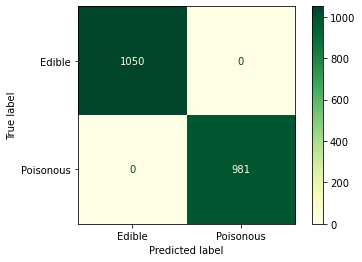

----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

----------------------------------------
AUC Score: 1.0


In [37]:
#Predictions:

y_pred_dt1 = dt1.predict(X_test)


#Performance:

print("Accuracy:", accuracy_score(y_test,y_pred_dt1))
print("----------------------------------------")

#Confusion Marix and its Visualisation


print("Confusion Matrix")
plot_confusion_matrix(dt1, X_test,y_test, cmap = plt.cm.YlGn,display_labels=target_names)
plt.show()
print("----------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred_dt1))
print("----------------------------------------")

#AUC Score

print("AUC Score:" , roc_auc_score(y_test,y_pred_dt1))


## RANDOM FOREST

In [38]:
rf = RandomForestClassifier(random_state=265)
rf = rf.fit(X_train,y_train)

Accuracy: 1.0
----------------------------------------
Confusion Matrix


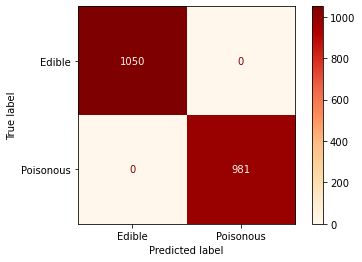

----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

----------------------------------------
AUC Score: 1.0


In [39]:
#Predictions:

y_pred_rf = rf.predict(X_test)

#Performance:

print("Accuracy:", accuracy_score(y_test,y_pred_rf))
print("----------------------------------------")

#Confusion Marix and its Visualisation

print("Confusion Matrix")
plot_confusion_matrix(rf, X_test,y_test, cmap = plt.cm.OrRd,display_labels=target_names)
plt.show()
print("----------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred_rf))
print("----------------------------------------")

#AUC Score

print("AUC Score:" , roc_auc_score(y_test,y_pred_rf))


### Random Forest Parameter Tuning

In [40]:
grid_param_rand = {
       'n_estimators': [10,20,30,40,50,100,150],
       'criterion':['gin1','entropy'],
       'max_features' : ['auto','log2'],
}

grid_search = GridSearchCV(estimator=rf,param_grid=grid_param_rand,cv=6,n_jobs=-1,verbose=3)

grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 6 folds for each of 28 candidates, totalling 168 fits


{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 10}

In [41]:
rf1 = RandomForestClassifier(criterion= 'entropy', max_features= 'auto', n_estimators= 10)
rf1 = rf1.fit(X_train,y_train)                                                                                                  

Accuracy: 1.0
----------------------------------------
Confusion Matrix


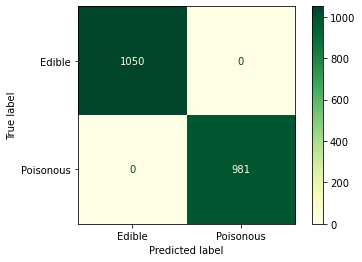

----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1050
           1       1.00      1.00      1.00       981

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

----------------------------------------
AUC Score: 1.0


In [42]:
#Predictions:

y_pred_rf1 = rf1.predict(X_test)


#Performance:

print("Accuracy:", accuracy_score(y_test,y_pred_rf1))
print("----------------------------------------")

#Confusion Marix and its Visualisation

print("Confusion Matrix")
plot_confusion_matrix( rf1 , X_test,y_test , cmap = plt.cm.YlGn , display_labels=target_names )
plt.show()
print("----------------------------------------")
print("Classification Report")
print(classification_report(y_test,y_pred_rf1))
print("----------------------------------------")

#AUC Score

print("AUC Score:" , roc_auc_score(y_test,y_pred_rf1))                                                                          

#### Creating Pickle File

In [43]:
import pickle
filename = 'mushrooms.pkl'
pickle.dump(rf1,open(filename,'wb'))